In [4]:
start_date = '2024-11-04'
end_date = '2025-11-25'
ticker = 'AI'

In [5]:
import yfinance as yf

# Download C3.AI (AI) stock data for the specified period
ai = yf.download('AI', start='2024-11-04', end='2025-11-05')

# Display the first few rows
print(ai.head())

C:\Users\prath\AppData\Local\Temp\ipykernel_8056\4270293740.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ai = yf.download('AI', start='2024-11-04', end='2025-11-05')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker             AI         AI         AI         AI       AI
Date                                                           
2024-11-04  24.840000  25.030001  24.200001  24.820000  2390600
2024-11-05  26.590000  26.790001  25.250000  25.350000  3397300
2024-11-06  27.700001  28.530001  27.350000  27.490000  5510900
2024-11-07  27.520000  28.549999  27.400000  27.730000  3450700
2024-11-08  27.559999  27.719999  26.690001  27.379999  2762100


In [6]:
ai.columns = ai.columns.get_level_values(0)

# Display the modified DataFrame
ai.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-11-04,24.840000,25.030001,24.200001,24.820000,2390600
2024-11-05,26.590000,26.790001,25.250000,25.350000,3397300
2024-11-06,27.700001,28.530001,27.350000,27.490000,5510900
2024-11-07,27.520000,28.549999,27.400000,27.730000,3450700
2024-11-08,27.559999,27.719999,26.690001,27.379999,2762100


In [7]:
start_price = ai['Close'].iloc[0]
end_price = ai['Close'].iloc[-1]

total_return = ((end_price - start_price) / start_price) * 100

print(f"Total return: {total_return:.2f}%")

Total return: -36.47%


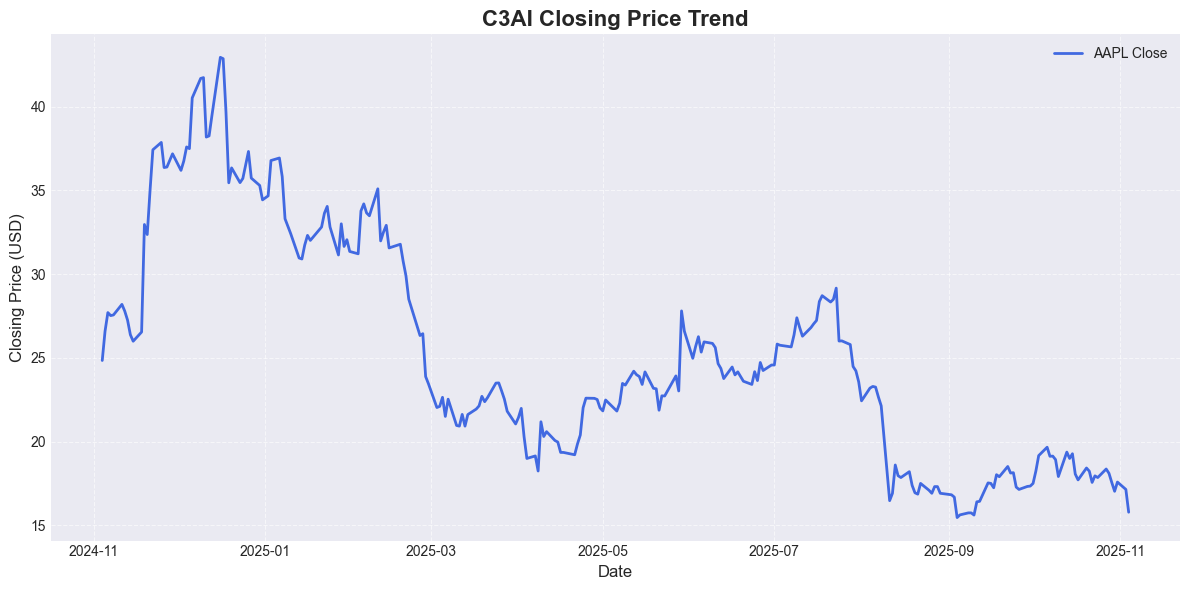

In [8]:
import matplotlib.pyplot as plt

# Set the style for the plot
plt.style.use('seaborn-v0_8-darkgrid')

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Plot the closing price trend
plt.plot(ai.index, ai['Close'], color='royalblue', linewidth=2, label='AAPL Close')

# Add title and labels
plt.title('C3AI Closing Price Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Add grid, legend, and tight layout for better spacing
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Peak price: 42.94 on 2024-12-16 00:00:00
Lowest price: 15.46 on 2025-09-04 00:00:00


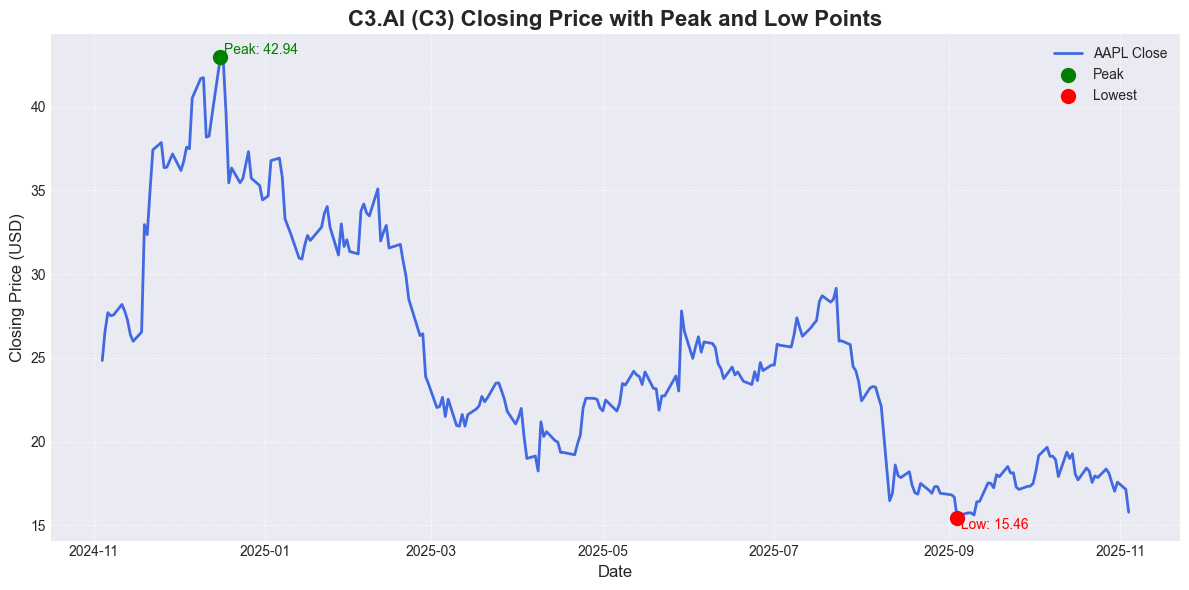

In [9]:
import matplotlib.pyplot as plt

# Find the peak (maximum) and lowest (minimum) closing prices
peak_price = ai['Close'].max()
lowest_price = ai['Close'].min()

# Corresponding dates
peak_date = ai['Close'].idxmax()
lowest_date = ai['Close'].idxmin()

# Print the results
print(f"Peak price: {peak_price:.2f} on {peak_date}")
print(f"Lowest price: {lowest_price:.2f} on {lowest_date}")

# --- Plot the closing price trend ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))

# Plot the line chart
plt.plot(ai.index, ai['Close'], color='royalblue', linewidth=2, label='AAPL Close')

# Highlight peak and lowest points
plt.scatter(peak_date, peak_price, color='green', s=100, label='Peak', zorder=5)
plt.scatter(lowest_date, lowest_price, color='red', s=100, label='Lowest', zorder=5)

# Annotate the points
plt.text(peak_date, peak_price, f' Peak: {peak_price:.2f}', color='green', fontsize=10, va='bottom', ha='left')
plt.text(lowest_date, lowest_price, f' Low: {lowest_price:.2f}', color='red', fontsize=10, va='top', ha='left')

# Add title, labels, grid, and legend
plt.title('C3.AI (C3) Closing Price with Peak and Low Points', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the final chart
plt.show()

In [10]:
import os
import json
import requests
from dotenv import load_dotenv

# Load environment variables (SERPER_API_KEY)
load_dotenv()
serper_api_key = os.getenv("SERPER_API_KEY")

if serper_api_key is None:
    raise ValueError("Missing SERPER_API_KEY in .env file")

# Function to search news using Serper API
def search_news(query, date):
    url = "https://google.serper.dev/news"
    headers = {
        "X-API-KEY": serper_api_key,
        "Content-Type": "application/json"
    }
    payload = {
        "q": query,
        "num": 5  # Number of news results to fetch
    }

    response = requests.post(url, headers=headers, json=payload)
    response.raise_for_status()
    results = response.json()

    snippets = []
    for item in results.get("news", []):
        snippet_data = {
            "title": item.get("title"),
            "link": item.get("link"),
            "snippet": item.get("snippet")
        }
        snippets.append(snippet_data)

    return snippets

# --- Search Apple news around the peak and lowest dates ---
peak_query = f"C3.AI stock news {peak_date.strftime('%Y-%m-%d')}"
lowest_query = f"C3.AI stock news {lowest_date.strftime('%Y-%m-%d')}"

peak_news_snippets = search_news(peak_query, peak_date)
lowest_news_snippets = search_news(lowest_query, lowest_date)

# --- Store results in a JSON string ---
news_snippets = json.dumps({
    "peak_date": peak_date.strftime('%Y-%m-%d'),
    "lowest_date": lowest_date.strftime('%Y-%m-%d'),
    "peak_news_snippets": peak_news_snippets,
    "lowest_news_snippets": lowest_news_snippets
}, indent=4)

# Print the JSON result
print(news_snippets)

{
    "peak_date": "2024-12-16",
    "lowest_date": "2025-09-04",
    "peak_news_snippets": [
        {
            "title": "Why C3.ai Stock Crashed 11% on Thursday",
            "link": "https://finance.yahoo.com/news/why-c3-ai-stock-crashed-161056931.html",
            "snippet": "Artificial intelligence (AI) applications company C3.ai (NYSE: AI) sold off 11.2% through 10:50 a.m. ET this morning after KeyBanc analyst..."
        },
        {
            "title": "Should You Buy C3.ai Stock While It's Under $50?",
            "link": "https://www.fool.com/investing/2024/12/16/should-you-buy-c3ai-stock-while-its-under-50/",
            "snippet": "C3.ai (AI 2.36%) was one of the first enterprise artificial intelligence (AI) companies in the world when it was founded in 2009."
        },
        {
            "title": "C3.ai: The Enterprise AI Giant Of Tomorrow--Unbelievably Cheap Today",
            "link": "https://seekingalpha.com/article/4745006-c3ai-stock-the-enterprise-ai-giant-o

In [11]:
# Calculate daily percentage changes
daily_returns = ai['Close'].pct_change()

# Compute volatility (standard deviation of daily returns) in percentage
volatility = daily_returns.std() * 100

# Print the result
print(f"Overall volatility: {volatility:.2f}%")

Overall volatility: 4.53%


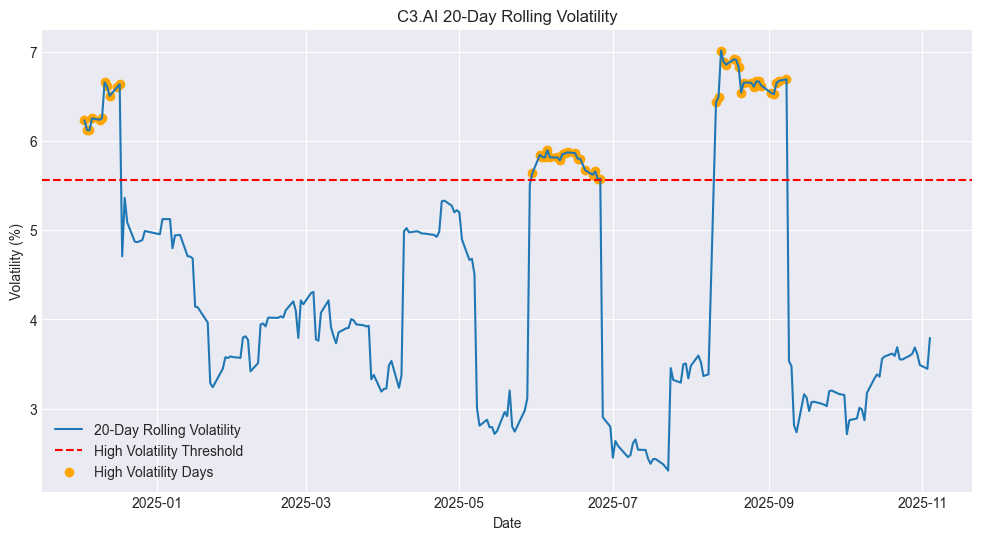

Price,Close,High,Low,Open,Volume,rolling_volatility
Date,,,,,,
2024-12-03,36.750000,37.279999,35.389999,35.555000,4158000,6.230159
2024-12-04,37.590000,39.349998,37.150002,37.369999,7207100,6.123073
2024-12-05,37.490002,39.638000,37.445000,37.880001,7538400,6.116988
2024-12-06,40.520000,40.650002,38.130001,38.290001,14028200,6.251789
2024-12-09,41.680000,42.939999,40.090000,41.900002,27865300,6.236113


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Compute daily percentage changes
daily_returns = ai['Close'].pct_change()

# 2. Calculate 20-day rolling volatility (in %)
ai['rolling_volatility'] = daily_returns.rolling(window=20).std() * 100

# 3. Define threshold: mean + std
threshold = ai['rolling_volatility'].mean() + ai['rolling_volatility'].std()

# 4. Identify high volatility days
high_vol_days = ai[ai['rolling_volatility'] > threshold]

# 5. Plot rolling volatility
plt.figure(figsize=(12,6))
plt.plot(ai.index, ai['rolling_volatility'], label='20-Day Rolling Volatility')
plt.axhline(threshold, color='r', linestyle='--', label='High Volatility Threshold')
plt.scatter(high_vol_days.index, high_vol_days['rolling_volatility'], color='orange', label='High Volatility Days')
plt.title('C3.AI 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

# Display first few high volatility days
high_vol_days.head()

In [ ]:
from openai import OpenAI
from dotenv import load_dotenv
import os

# Load API key
load_dotenv()
okey=os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=okey)

# Prepare prompt
prompt = f"""
Generate an insightful, concise financial summary for the stock analysis below.

Ticker: {ticker}
Analysis period: {start_date} to {end_date}

Total Return: {total_return:.2f}%
Volatility: {volatility:.2f}%

Peak Date: {peak_date} (Price: {peak_price})
Lowest Date: {lowest_date} (Price: {lowest_price})

High Volatility Days (sample):
{high_vol_days.head().to_string(index=False)}

Relevant News Snippets:
{news_snippets}

Please produce a well-organized summary highlighting the stock's performance trends, volatility insights, and possible reasons from the news context.
"""

# Generate summary using gpt-4.1-mini
response = client.chat.completions.create(
    model="gpt-4.1-mini",
    messages=[
        {"role": "system", "content": "You are a financial analyst."},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,
)

# Extract summary
summary = response.choices[0].message.content

# Display summary
print(summary)

C3.ai (NYSE: AI) experienced a challenging period from November 2024 to November 2025, marked by a significant total return decline of 36.47% alongside moderate volatility at 4.53%. The stock peaked on December 16, 2024, at approximately $42.94 before entering a sustained downtrend, hitting its lowest point at $15.46 on September 4, 2025.

Volatility spikes were observed around the peak period, with rolling volatility values exceeding 6.1 on several high-volume trading days, reflecting investor uncertainty and heightened trading activity. This elevated volatility coincided with key news events, including a sharp 11.2% intraday sell-off triggered by analyst downgrades and market concerns despite positive long-term narratives emphasizing C3.ai’s strategic partnerships (notably with Microsoft), patent protections, and positioning in the AI sector.

The subsequent decline toward the lowest price point was driven by disappointing quarterly earnings reports, a notable CEO change, and the wit

In [27]:
# client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
# print(os.getenv("OPENAI_API_KEY"))

In [17]:
df=pd.DataFrame({'id':[1,2,3,4,5],'name':['Joe','Jim','Henry','Sam','Max'],'salary':[70000,90000,80000,60000,90000],'departmentId':[1,1,2,2,1]})

In [21]:
df.groupby('departmentId').agg({'salary':'max'}).reset_index()

,departmentId,salary
0,1,90000
1,2,80000
